# 1. Import libraries and Do nessary formatting 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
from math import sqrt
%matplotlib inline

## Load Titanic data set

In [2]:
data = pd.read_csv("Data/Titanic.csv")

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


The variables that describe the passengers are:

* PassengerId: and id given to each traveler on the boat
* Pclass: the passenger class. It has three possible values: 1,2,3
* The Name
* The Sex
* The Age
* SibSp: number of siblings and spouses traveling with the passenger
* Parch: number of parents and children traveling with the passenger
* The ticket number
* The ticket Fare
* The cabin number
* The embarkation. It has three possible values S,C,Q

In [4]:
data.drop('PassengerId', axis=1, inplace=True)

### statistically describe numerical features 

In [5]:
data.describe()

C:\Anaconda2\envs\Python3\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,NaN,0.000000,0.000000,7.910400
50%,0.000000,3.000000,NaN,0.000000,0.000000,14.454200
75%,1.000000,3.000000,NaN,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


The count variable shows that 177 values are missing in the Age column.

One solution is to replace the null values with the median age which is more robust to outliers than the mean.

In [6]:
data['Age'].fillna(data['Age'].median(), inplace=True)

Let's check that again.

In [7]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Exploratory Data Analysis

Data Exploration is the key to getting insights from data. Practitioners say a good data exploration strategy can solve even complicated problems in few hours. A good data exploration strategy comprises the following:

* Univariate Analysis - It is used to visualize one variable in one plot. Examples: histogram, density plot, etc.
* Bivariate Analysis - It is used to visualize two variables (x and y axis) in one plot. Examples: bar chart, line chart, area chart, etc.
* Multivariate Analysis - As the name suggests, it is used to visualize more then two variables at once. Examples: stacked bar chart, dodged bar chart, etc.
* Cross Tables -They are used to compare the behavior of two categorical variables (used in pivot tables as well).

Let's look at a histogram of the age distribution. What can you tell from the graph?

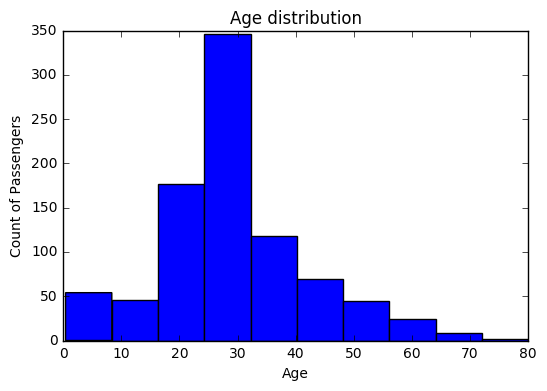

In [8]:
plot_name = "age_dist"
plt.hist(data['Age'], bins = 10, range = (data['Age'].min(),data['Age'].max()))
plt.title('Age distribution')
plt.xlabel('Age')
plt.ylabel('Count of Passengers')
plt.savefig('image/%s.pdf' %(plot_name), format='pdf')

Now let's look at a histogram of the fares. What does it tell you?

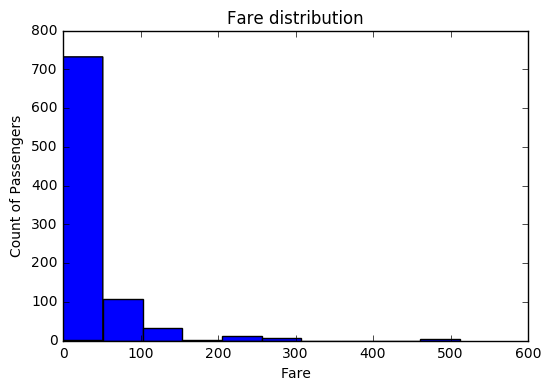

In [9]:
plot_name = "fair_dist"
plt.hist(data['Fare'], bins = 10, range = (data['Fare'].min(),data['Fare'].max()))
plt.title('Fare distribution')
plt.xlabel('Fare')
plt.ylabel('Count of Passengers')
plt.savefig('image/%s.pdf' %(plot_name), format='pdf')

### Let's make a boxplot for the distributions of age for each class.


Note: The box plot is a standardized way of displaying the distribution of data based on the five number summary: minimum, first quartile, median, third quartile, and maximum. More [details](http://www.physics.csbsju.edu/stats/box2.html)

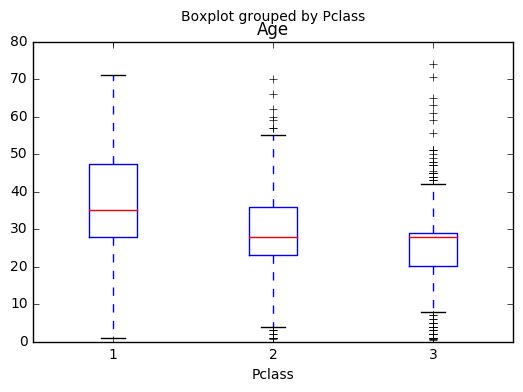

In [10]:
plot_name = "age_class"
data.boxplot(column='Age', by='Pclass', grid=False)
plt.savefig('image/%s.pdf' %(plot_name), format='pdf')

The median age in the first class tend to be older than those in the second and third classes. There are also a lot of outliers who are both children and seniors in the second and third classes.

### Let's make a boxplot for the distributions of fare for each class.


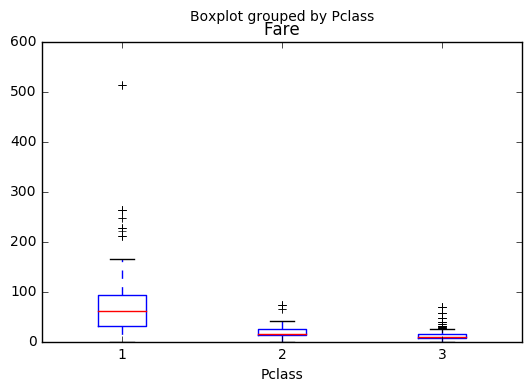

In [11]:
plot_name = "fare_class"
data.boxplot(column='Fare', by='Pclass', grid=False)
plt.savefig('image/%s.pdf' %(plot_name), format='pdf')

#### Let's visualize survival based on the gender.

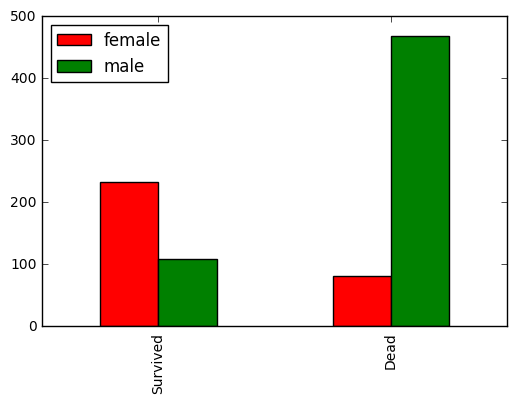

In [12]:
plot_name = "survival_gender"
survived_sex = data[data['Survived']==1]['Sex'].value_counts()
dead_sex = data[data['Survived']==0]['Sex'].value_counts()
df = pd.DataFrame([survived_sex,dead_sex])
df.index = ['Survived','Dead']
df.plot(kind='bar', color = ['r','g'])
plt.savefig('image/%s.pdf' %(plot_name), format='pdf')

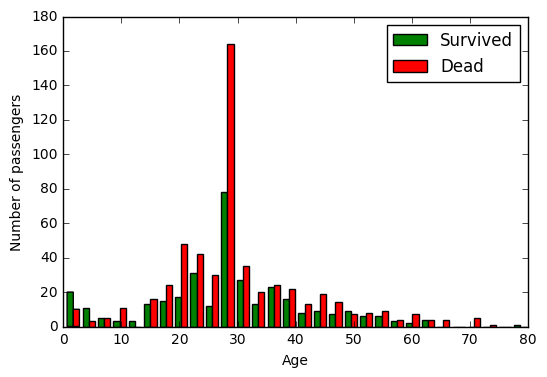

In [13]:
plot_name = "survival_age"
plt.hist([data[data['Survived']==1]['Age'], data[data['Survived']==0]['Age']], color = ['g','r'],
         bins = 30,label = ['Survived','Dead'])
plt.xlabel('Age')
plt.ylabel('Number of passengers')
plt.legend()
plt.savefig('image/%s.pdf' %(plot_name), format='pdf')

If you follow the chart bin by bin, you will notice that passengers who are less than 10 are more likely to survive than older ones who are more than 12 and less than 50. Older passengers seem to be rescued too.

These two first charts confirm that one old code of conduct that sailors and captains follow in case of threatening situations: "Women and children first !"

Let's now focus on the Fare ticket of each passenger and correlate it with the survival.

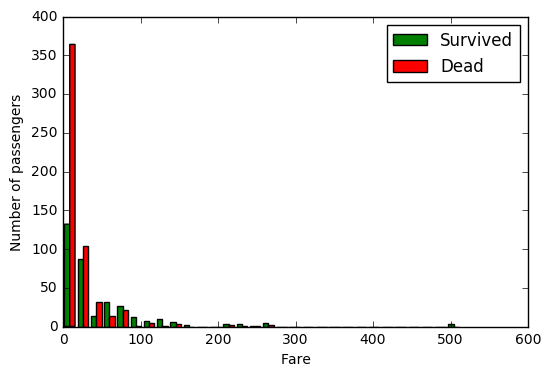

In [14]:
plot_name = "survival_fair"
plt.hist([data[data['Survived']==1]['Fare'],data[data['Survived']==0]['Fare']], color = ['g','r'],
         bins = 30,label = ['Survived','Dead'])
plt.xlabel('Fare')
plt.ylabel('Number of passengers')
plt.legend()
plt.savefig('image/%s.pdf' %(plot_name), format='pdf')

Passengers with cheaper ticket fares are more likely to die. Put differently, passengers with more expensive tickets, and therefore a more important social status, seem to be rescued first.

In [15]:
survived_age =data[data['Survived']==1]['Age']
survived_fare =data[data['Survived']==1]['Fare']
dead_age =data[data['Survived']==0]['Age']
dead_fare =data[data['Survived']==0]['Fare']

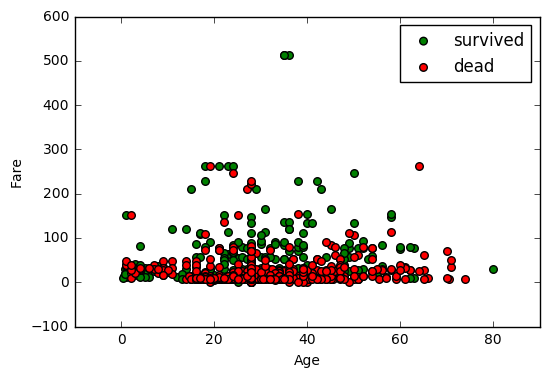

In [17]:
plot_name = "survival_fair_age"
plt.scatter(survived_age,survived_fare,c='green',s=30)
plt.scatter(dead_age,dead_fare,c='red',s=30)
plt.xlabel('Age')
plt.ylabel('Fare')
plt.legend(('survived','dead'),scatterpoints=1,loc='upper right')
plt.savefig('image/%s.pdf' %(plot_name), format='pdf')          

A distinct cluster of dead passengers (the red one) appears on the chart. Those people are adults (age between 15 and 50) of lower class (lowest ticket fares).

## Correlation

In [18]:
# 'Sex' is stored as a text value. We should convert (or 'map') it into numeric binaries 
# so it will be ready for scikit-learn.
data['Sex'] = data['Sex'].map({'male': 0,'female': 1})

In [19]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

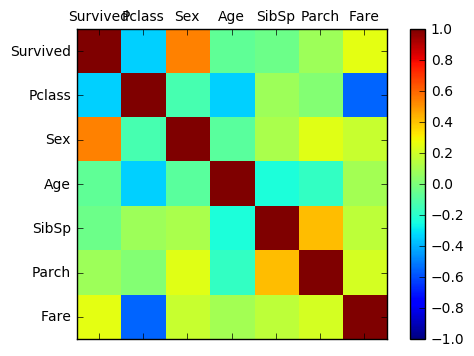

In [20]:
correlations = data.corr()
# plot correlation matrix
names = ['Survived','Pclass','Sex','Age','SibSp','Parch','Fare']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(names),1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names);

In [21]:
data.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,0.543351,-0.064910,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.131900,-0.339898,0.083081,0.018443,-0.549500
Sex,0.543351,-0.131900,1.000000,-0.081163,0.114631,0.245489,0.182333
Age,-0.064910,-0.339898,-0.081163,1.000000,-0.233296,-0.172482,0.096688
SibSp,-0.035322,0.083081,0.114631,-0.233296,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,0.245489,-0.172482,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.182333,0.096688,0.159651,0.216225,1.000000


Looking at the correlation matrix above:

* sex and class have relatively higher correlations to survival compared to other factors. Being a female is moderately associated with not surviving. 

There are also notable loose and moderate correlations between the following factors:

* Fare and class;
* Age and class; and
* The number of siblings and the number of parents in the family.

The Sex variable seems to be a decisive feature. Women are more likely to survive.

## References

* [Practical Machine Learning Project in Python on House Prices Data](https://www.hackerearth.com/practice/machine-learning/machine-learning-projects/python-project/tutorial/)